<a href="https://colab.research.google.com/github/VARSHAMG23/ML-Algorithms/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering -Usupervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kmeans Packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [9]:
df.drop_duplicates(inplace=True)

Encoding Gender Column

In [10]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [11]:
df.dtypes

,0
CustomerID,int64
Gender,int64
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


Machine Learning

In [25]:
X=df.values
X

array([[  1,   1,  19,  15,  39],
       [  2,   1,  21,  15,  81],
       [  3,   0,  20,  16,   6],
       [  4,   0,  23,  16,  77],
       [  5,   0,  31,  17,  40],
       [  6,   0,  22,  17,  76],
       [  7,   0,  35,  18,   6],
       [  8,   0,  23,  18,  94],
       [  9,   1,  64,  19,   3],
       [ 10,   0,  30,  19,  72],
       [ 11,   1,  67,  19,  14],
       [ 12,   0,  35,  19,  99],
       [ 13,   0,  58,  20,  15],
       [ 14,   0,  24,  20,  77],
       [ 15,   1,  37,  20,  13],
       [ 16,   1,  22,  20,  79],
       [ 17,   0,  35,  21,  35],
       [ 18,   1,  20,  21,  66],
       [ 19,   1,  52,  23,  29],
       [ 20,   0,  35,  23,  98],
       [ 21,   1,  35,  24,  35],
       [ 22,   1,  25,  24,  73],
       [ 23,   0,  46,  25,   5],
       [ 24,   1,  31,  25,  73],
       [ 25,   0,  54,  28,  14],
       [ 26,   1,  29,  28,  82],
       [ 27,   0,  45,  28,  32],
       [ 28,   1,  35,  28,  61],
       [ 29,   0,  40,  29,  31],
       [ 30,  

In [34]:
wcss = []

for k in range(1, 9):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X)

  print(kmeans.inertia_)
  wcss.append(kmeans.inertia_)

975512.06
387065.7137713772
271765.8097426471
195401.19855991477
157505.7207247758
122670.55266775498
105923.62731643056
95059.11678810314


In [30]:
wcss

[975512.06,
 387065.7137713772,
 271384.50878286787,
 195418.6866987181,
 178275.42901037395,
 137438.17837486314,
 114507.40697936002,
 99545.2132527364,
 77582.35441971477]

Plot the graph between wcss and its corresponding k-values

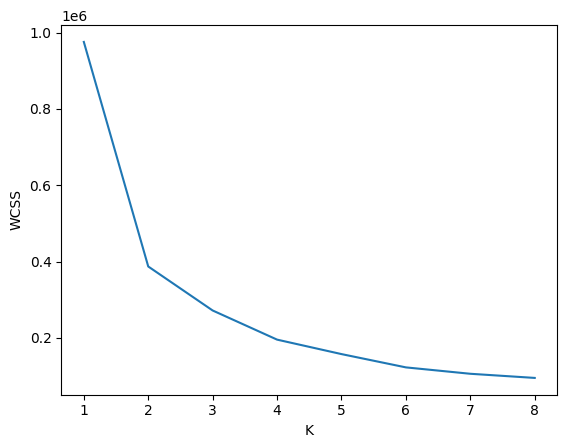

In [35]:
plt.plot(range(1, 9), wcss)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

Optimal k value is 6

In [36]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans.fit(X) #start making 6 clusters and divide the data points in those clusters

y = kmeans.predict(X)

In [37]:
kmeans.cluster_centers_ #centroids for 5 clms

array([[ 92.98360656,   0.42622951,  42.45901639,  57.90163934,
         49.86885246],
       [ 37.72972973,   0.37837838,  46.83783784,  34.10810811,
         32.45945946],
       [162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513],
       [182.        ,   0.5       ,  43.5       ,  99.88888889,
         19.88888889],
       [ 22.32      ,   0.4       ,  25.48      ,  25.48      ,
         75.44      ],
       [144.        ,   0.55      ,  37.6       ,  75.4       ,
         17.5       ]])

In [38]:
output = pd.DataFrame(y, columns = ['Cluster Number'])

In [40]:
final_df = pd.concat([df, output], axis = 1)

In [41]:
final_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,4
